In [1]:
# ---------------------------------------------------
# 1. Setup
# ---------------------------------------------------

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import missingno as msno
import pycountry
from geopy.geocoders import Nominatim
import time

# Set plot styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Display settings for pandas
pd.set_option('display.max_columns', None)

# Load the dataset
file_path = '/Users/durana/Documents/Articles_iWrite/Conferences/2025_SBE/bipv_facades_dataset/bipv_facades_dataset.csv'
df = pd.read_csv(file_path, na_values=["-"])
df.replace("-", np.nan, inplace=True)

# Quick check of data
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (400, 30)


,project_index,project_name,country,plant_year,project_type,project_function,pv_system,module_type,cell_type,transparency,extra_data,installed_power_kWp_,surface_area_m2,yield_kWh_per_A,specific_power_W_per_m2,color,texture,module_size,module_shape,cell_visibility,context,facade_ratio,orientation,inclination_degrees,type_of_integration,façade_composition_1,facade_composition_2,concept,module_orientation,ornamentation
0,1,Alan Gilbert Building,Australia,2001.0,New,Educational,Facade Glazing,NaN,NaN,Translucent,46 kWp,46.0,NaN,NaN,NaN,Black,Flat,Large,Rectangular,Yes,Urban,>0.5,N,80,Warm Facade,Homogeneous,Banner,Dominant,Vertical,No
1,2,K2 Apartments,Australia,2007.0,New,Residential,Facade Cladding,NaN,NaN,Opaque,22 kWp,22.0,NaN,NaN,NaN,Blue,Flat,Standard,Rectangular,Yes,Urban,<0.5,N,50,Rainscreen,Heterogeneous,Depth,Integration,Vertical,No
2,3,Active Energy Tower Fronius,Austria,2013.0,New,Office,Curtain wall,Monocrystalline,NaN,Translucent,"38.8 kWp, 630 m2, -",38.8,630.0,NaN,NaN,Black,Flat,Large,Rectangular,Yes,Urban,>0.5,All,90,Warm Facade,Homogeneous,Flat,Integration,Vertical,No
3,4,Genböch Bungalow Best Ager,Austria,2011.0,New,Residential,Unknown,Polycrystalline,Poly,Opaque,2011;Swiss BIPV Competence Center;0,2.3,NaN,NaN,NaN,Blue,Flat,Large,Rectangular,Yes,Agglomeration,<0.5,SW,75,Rainscreen,Homogeneous,Flat,Dominant,Vertical,No
4,5,Dwelling Houses Spinnereistrasse,Austria,2003.0,NaN,Residential,Solar Control,NaN,NaN,Opaque,NaN,NaN,NaN,NaN,NaN,Blue,Flat,Large,Rectangular,No,Agglomeration,<0.5,E;S;W,90,Solar Control,Heterogeneous,Rhythmic,Integration,Vertical,No



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   project_index            400 non-null    int64  
 1   project_name             400 non-null    object 
 2   country                  400 non-null    object 
 3   plant_year               389 non-null    float64
 4   project_type             318 non-null    object 
 5   project_function         372 non-null    object 
 6   pv_system                384 non-null    object 
 7   module_type              296 non-null    object 
 8   cell_type                151 non-null    object 
 9   transparency             360 non-null    object 
 10  extra_data               321 non-null    object 
 11  installed_power_kWp_     302 non-null    float64
 12  surface_area_m2          222 non-null    float64
 13  yield_kWh_per_A          143 non-null    float64
 14  specific_po

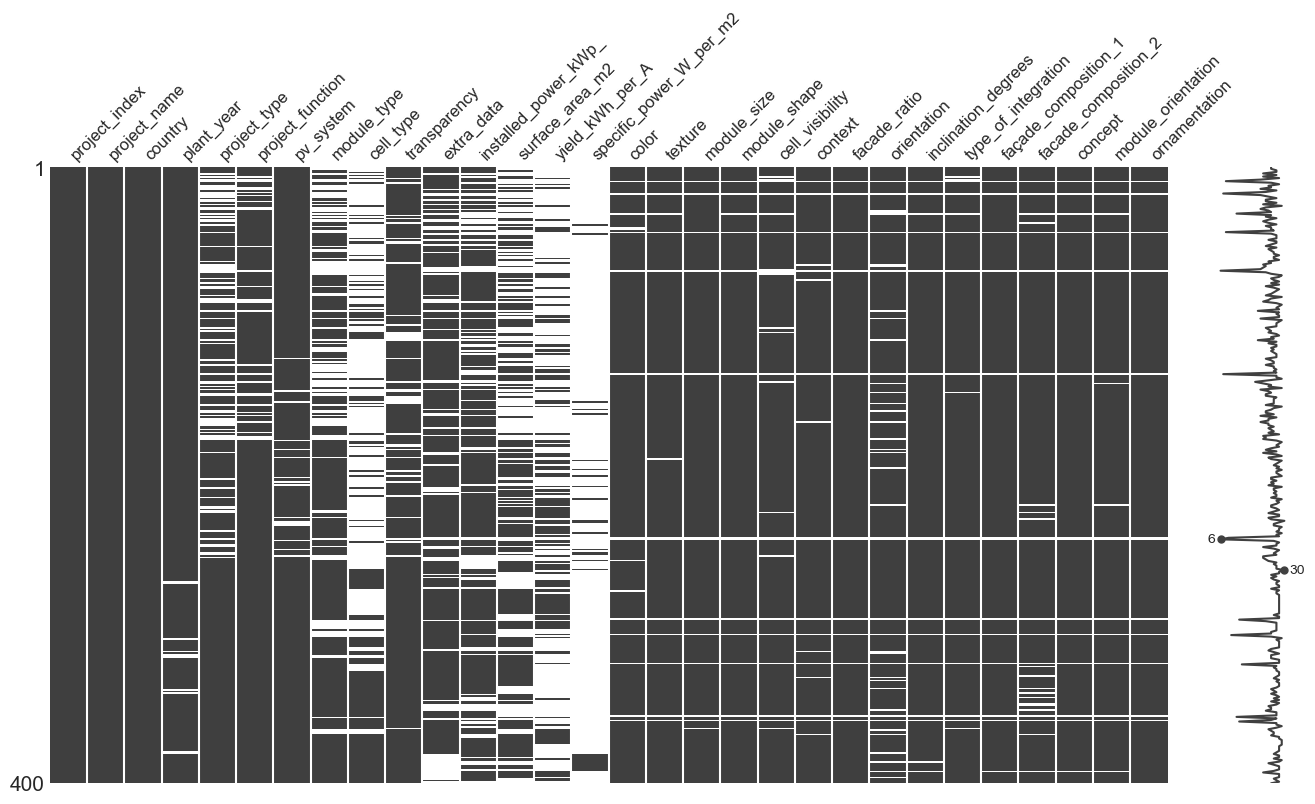


Unique values in 'country':
['Australia' 'Austria' 'Belgium' 'Canada' 'China' 'Denmark' 'Egypt'
 'England' 'Wales' 'France' 'Germany' 'India' 'Italy' 'Japan' 'Lithuania'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Scotland' 'Singapore'
 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Turkey'
 'United Arab Emirates' 'United States' 'United Kingdom' 'Liechtenstein'
 'Israel' 'Nigeria' 'Cyprus']

Unique values in 'project_type':
['New' nan 'Retrofit']

Unique values in 'module_type':
[nan 'Monocrystalline' 'Polycrystalline\xa0' 'Amorphous silicon'
 'Thin Film' 'Mixed' 'CIGS' 'Organic photovoltaic']

Unique values in 'cell_type':
[nan 'Poly' 'Mono' 'CIS' 'a-Si' 'Mixed']

Unique values in 'facade_ratio':
['>0.5' '<0.5' '1' nan '0.5']

Unique values in 'concept':
['Dominant' 'Integration' 'Subordination' nan 'Subjugation' 'Imitation']


In [2]:
# ---------------------------------------------------
# 2. Preprocessing
# ---------------------------------------------------

print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Visualize missing values as a matrix
if missing[missing > 0].any():
    print("\nVisualizing Missing Values (Matrix View):")
    msno.matrix(df, figsize=(16, 8), fontsize=12, sparkline=True)
    plt.show()
else:
    print("No missing values to visualize.")

# Preview unique values in selected fields
important_fields = ['country', 'project_type', 'module_type', 'cell_type', 'facade_ratio', 'concept']
for field in important_fields:
    print(f"\nUnique values in '{field}':")
    print(df[field].unique())


,count,mean,std,min,25%,50%,75%,max
plant_year,389.0,2014.637532,7.099784,1994.0,2009.0,2016.00,2021.0,2024.0
installed_power_kWp_,302.0,73.748179,121.995305,0.4,16.0,34.55,83.6,955.0
yield_kWh_per_A,143.0,65407.216783,93077.940123,800.0,14000.0,35000.00,79200.0,557400.0
specific_power_W_per_m2,29.0,120.103448,111.705718,28.0,55.0,115.00,130.0,652.0
inclination_degrees,374.0,85.013369,14.379660,0.0,90.0,90.00,90.0,90.0


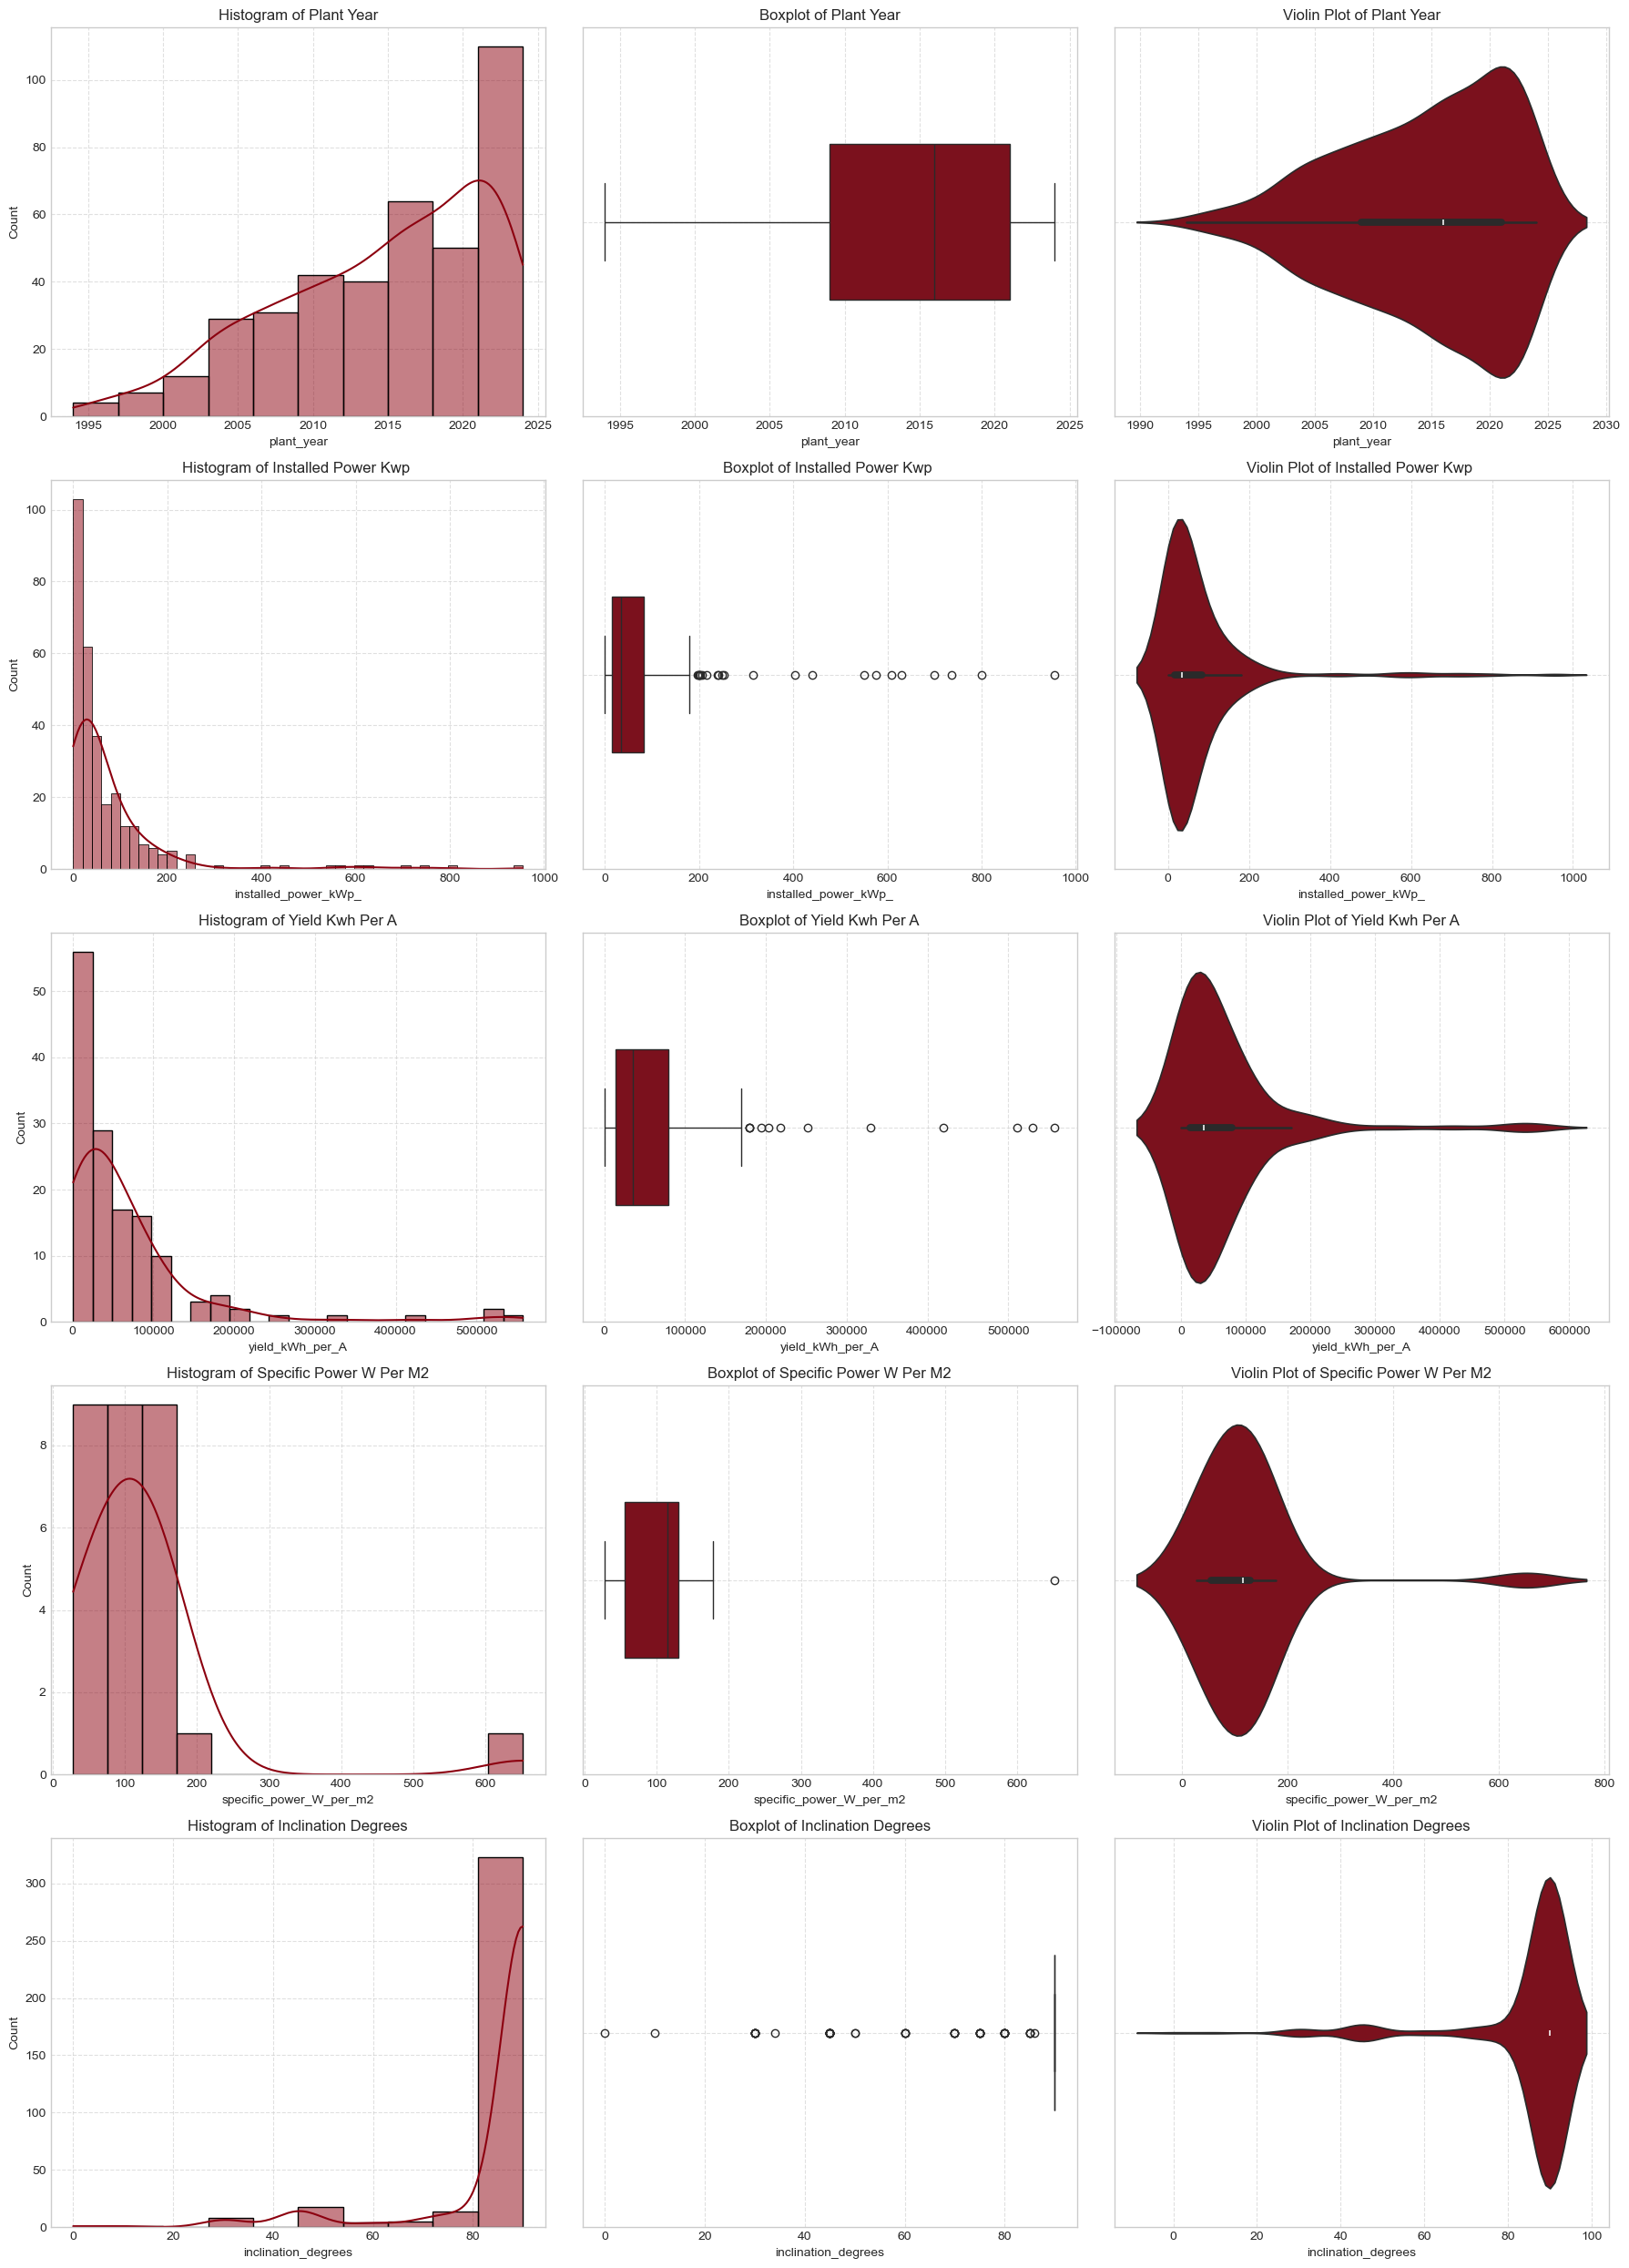

In [4]:
# ---------------------------------------------------
# Descriptive Statistics for Numeric Columns
# ---------------------------------------------------

# Numeric columns
numeric_cols = [
    'plant_year',
    'installed_power_kWp_', 
    'yield_kWh_per_A',
    'specific_power_W_per_m2',
    'inclination_degrees',
]

# Force numeric conversion, set errors='coerce' to handle strings
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display descriptive statistics
desc_stats = df[numeric_cols].describe().T
display(desc_stats)

# ---------------------------------------------------
# Visualizations for Numeric Columns
# ---------------------------------------------------

# Figure layout
n_cols = 3  # Histogram, Boxplot, Violin for each feature
n_rows = len(numeric_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.reshape(n_rows, n_cols)

vis_color = '#8C000F'
alpha = '0.65'

for idx, col in enumerate(numeric_cols):

    # Histogram
    sns.histplot(data=df, x=col, kde=True, bins='auto', ax=axes[idx, 0], color=vis_color, edgecolor='black')
    axes[idx, 0].set_title(f"Histogram of {col.replace('_', ' ').title()}")
    axes[idx, 0].grid(True, linestyle='--', alpha=0.6)

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[idx, 1], color=vis_color, width=0.4)
    axes[idx, 1].set_title(f"Boxplot of {col.replace('_', ' ').title()}")
    axes[idx, 1].grid(True, linestyle='--', alpha=0.6)

    # Violin plot
    sns.violinplot(data=df, x=col, ax=axes[idx, 2], color=vis_color, inner="box")
    axes[idx, 2].set_title(f"Violin Plot of {col.replace('_', ' ').title()}")
    axes[idx, 2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


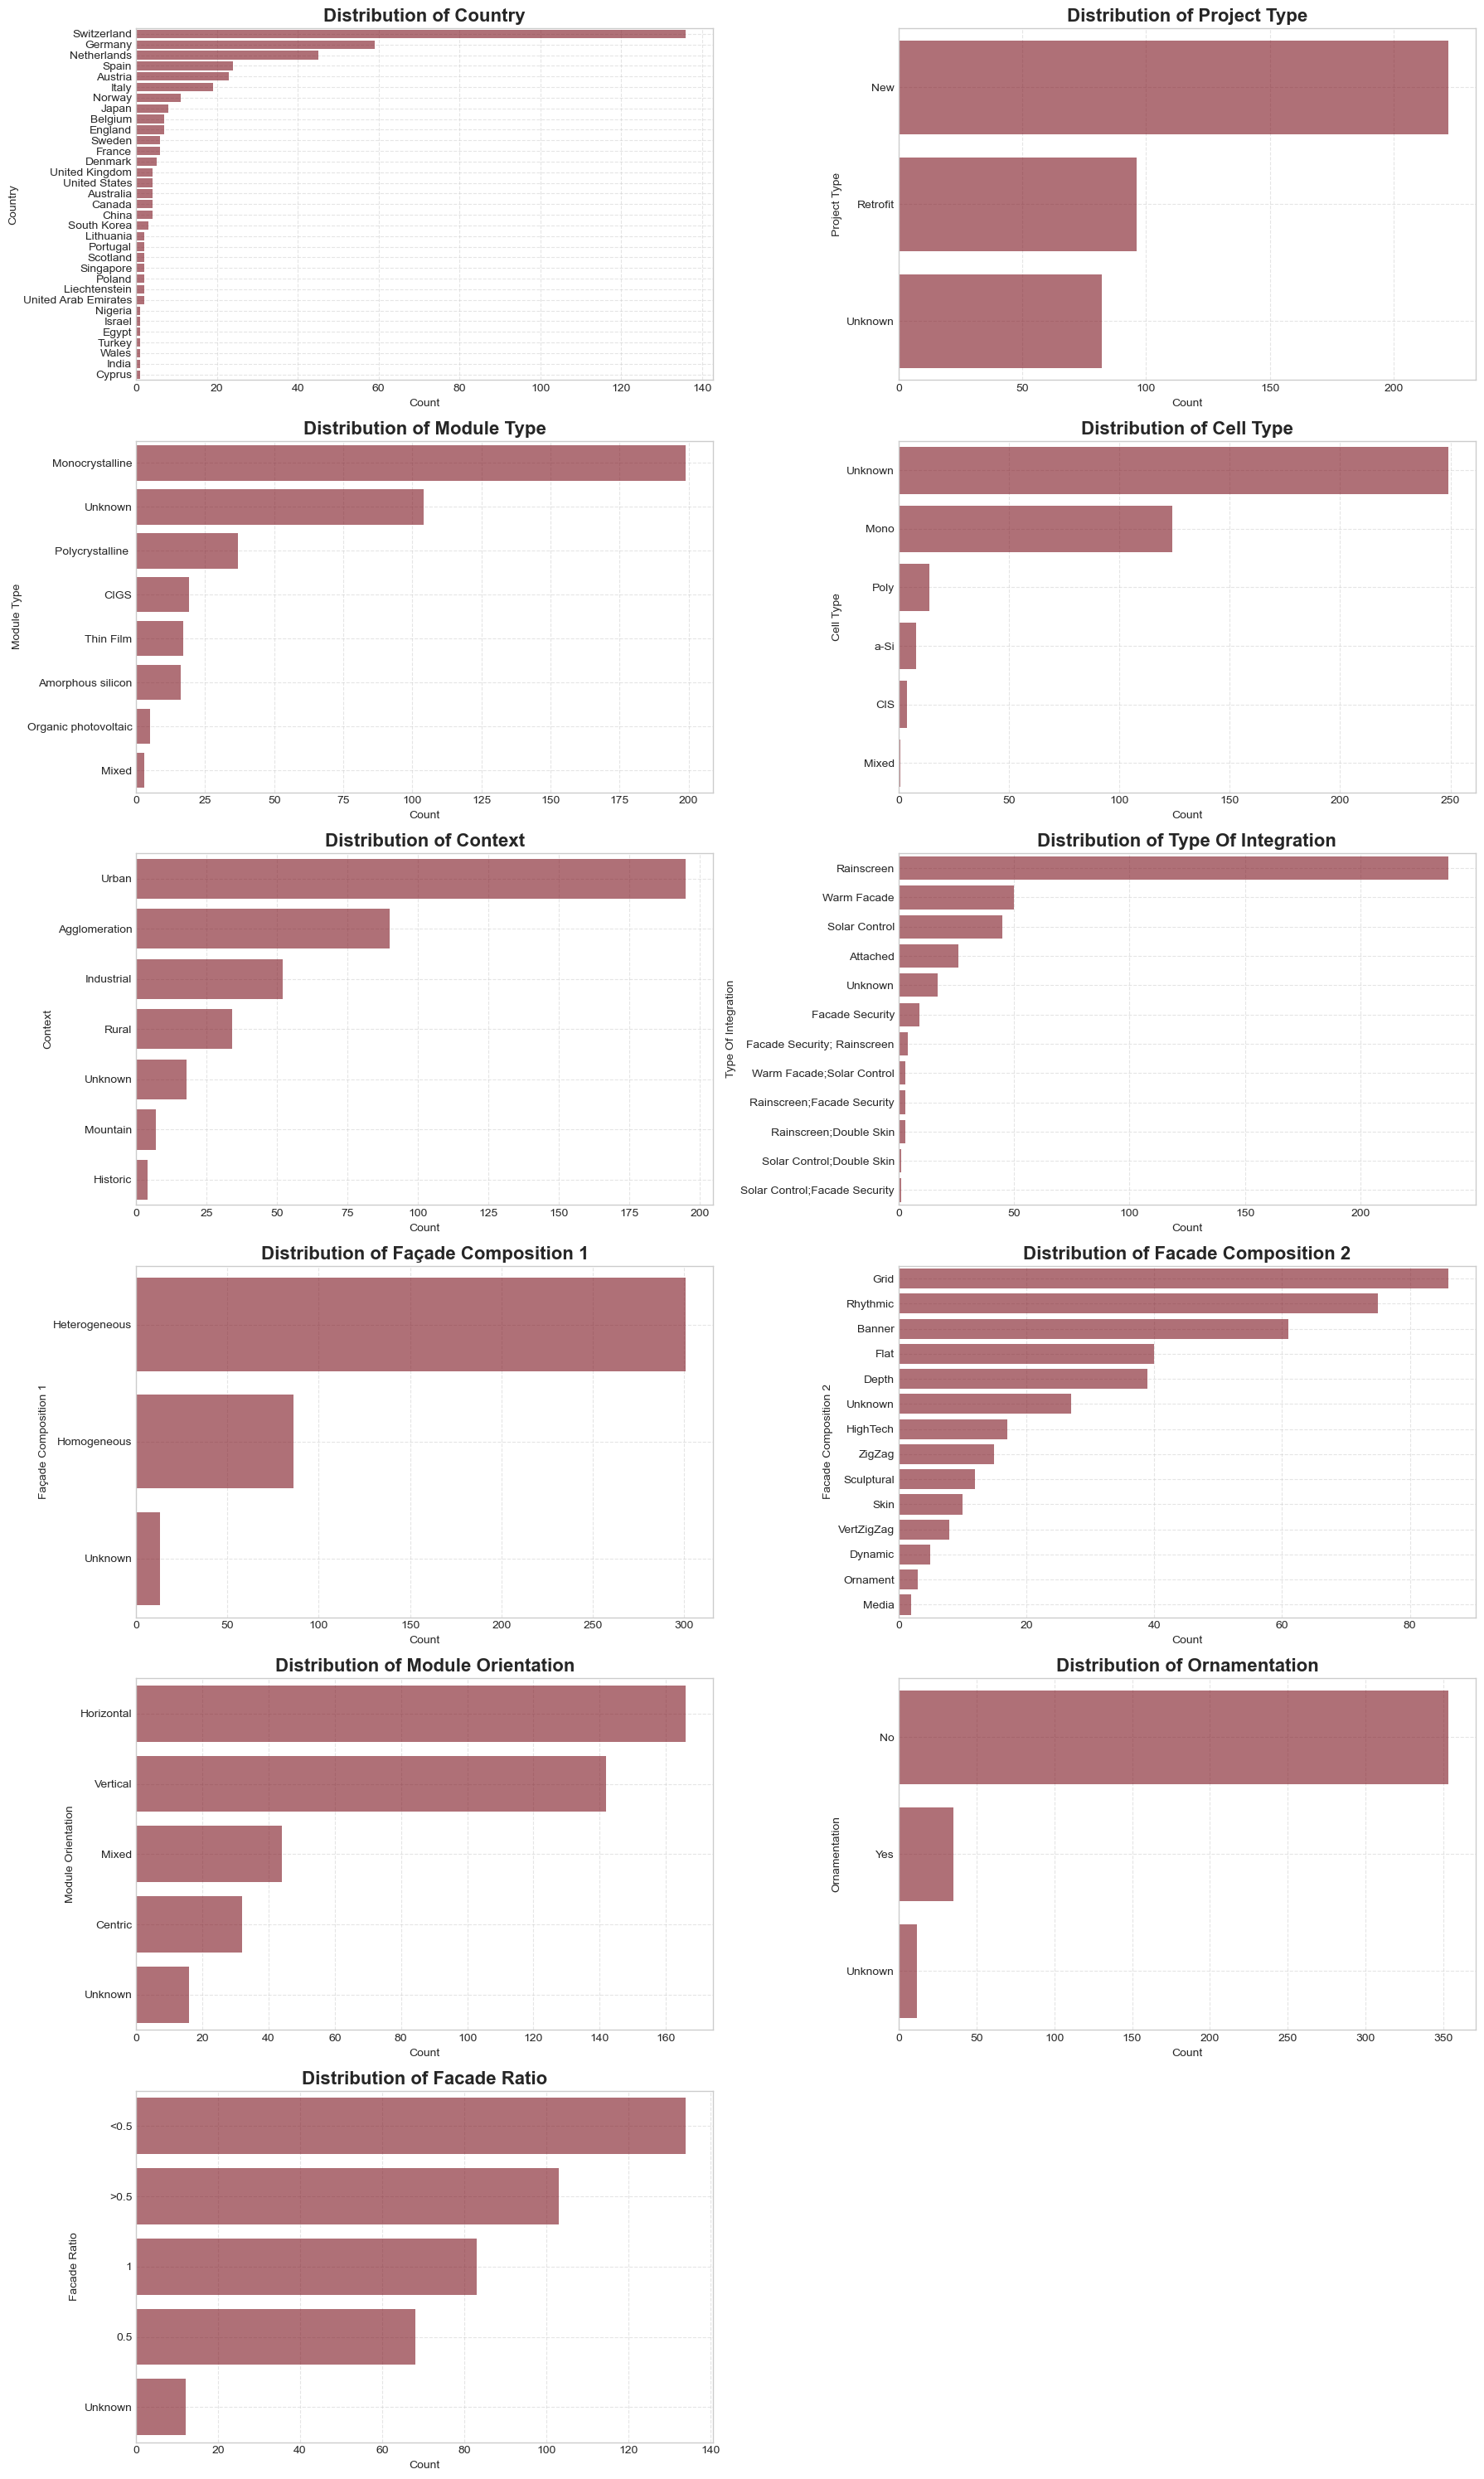

In [5]:
# ---------------------------------------------------
# 4.1 Visualizations for Categorical Features
# ---------------------------------------------------

categorical_cols = [
    'country',
    'project_type',
    'module_type',
    'cell_type',
    'context',
    'type_of_integration',
    'façade_composition_1',
    'facade_composition_2',
    'module_orientation',
    'ornamentation',
    'facade_ratio' 
]

# Set up layout
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

bar_color = "#8C000F"

for idx, col in enumerate(categorical_cols):

    temp_series = df[col].fillna("Unknown")
    
    value_counts = temp_series.value_counts()
    
    sns.barplot(
        x=value_counts.values,
        y=value_counts.index,
        ax=axes[idx],
        color=bar_color,
        alpha=0.6
    )
    
    axes[idx].set_title(f"Distribution of {col.replace('_', ' ').replace('Façade', 'Façade').title()}", fontsize=16, fontweight='bold')
    axes[idx].set_xlabel("Count")
    axes[idx].set_ylabel(col.replace('_', ' ').title())
    axes[idx].grid(True, linestyle='--', alpha=0.5)

# Remove unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [6]:
# ---------------------------------------------------
# 4.2 Map Visualization Based on Country (Frequency-Scaled)
# ---------------------------------------------------

# Due to data privacy reasons, the released version of the dataset does not include 
# the specific coordinates of the projects.

print("\nMap Visualization of Projects by Country (Scaled by Frequency):")

# Initialize geolocator
geolocator = Nominatim(user_agent="pv_facade_mapping")

# Prepare mapping of countries to coordinates
country_coords = {}

unique_countries = df['country'].dropna().unique()

# Set 1 sec between queries
for country in unique_countries:
    try:
        location = geolocator.geocode(country)
        if location:
            country_coords[country] = (location.latitude, location.longitude)
        time.sleep(1)
    except Exception as e:
        print(f"Warning: Could not geocode country '{country}': {e}")

# Count number of projects per country
country_counts = df['country'].value_counts()

# Prepare dataframe with coordinates
mapped_data = (
    pd.DataFrame({'country': country_counts.index, 'count': country_counts.values})
    .assign(
        Latitude=lambda x: x['country'].map(lambda y: country_coords.get(y, (None, None))[0]),
        Longitude=lambda x: x['country'].map(lambda y: country_coords.get(y, (None, None))[1])
    )
    .dropna(subset=['Latitude', 'Longitude'])
)

if mapped_data.empty:
    print("No valid country coordinates found. Skipping map visualization.")
else:
    map_center = [mapped_data['Latitude'].mean(), mapped_data['Longitude'].mean()]
    
    m = folium.Map(location=map_center, zoom_start=2, tiles="CartoDB Positron")
    
    for _, row in mapped_data.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=4 + row['count'] * 0.5,  # base radius + count to scale
            color=None,
            fill=True,
            fill_color="darkred",
            fill_opacity=0.5,
            popup=folium.Popup(f"{row['country']}: {row['count']} projects", parse_html=True),
        ).add_to(m)
    
    map_filename = "countries_map_scaled.html"
    m.save(map_filename)
    print(f"Map saved as {map_filename}. You can open it in a browser to view.")

    display(m)



Map Visualization of Projects by Country (Scaled by Frequency):
Map saved as countries_map_scaled.html. You can open it in a browser to view.


In [125]:
# A visualization from the original dataset with coordinates can be found below

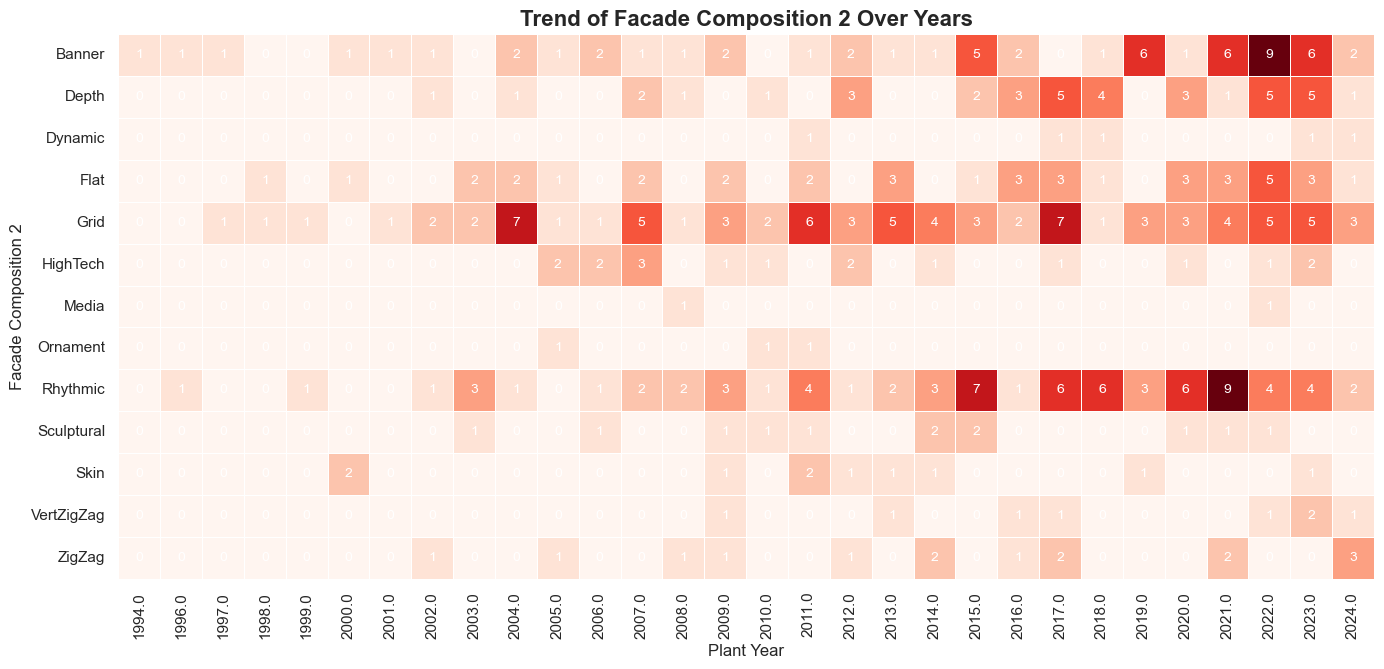

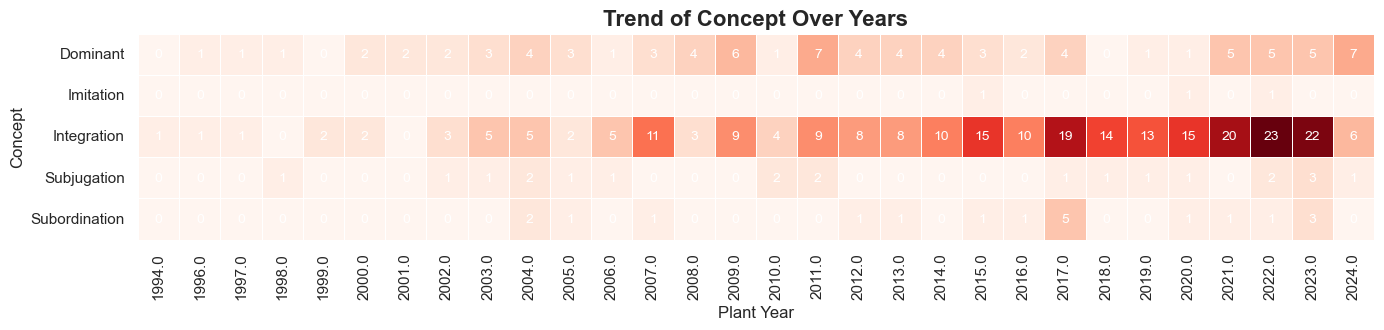

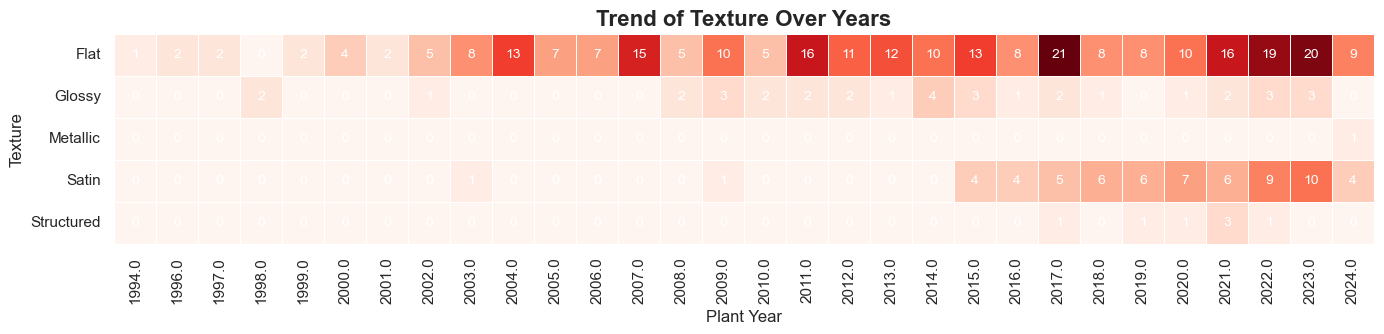

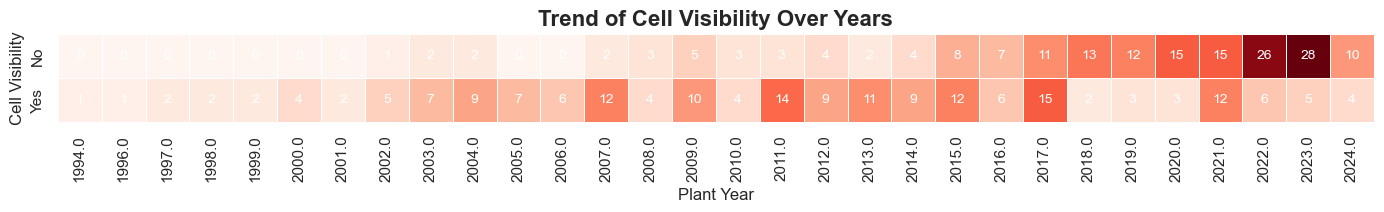

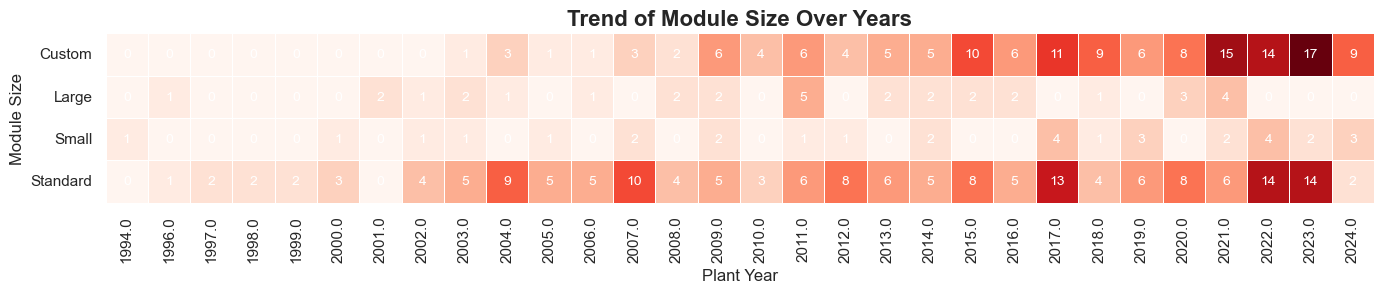

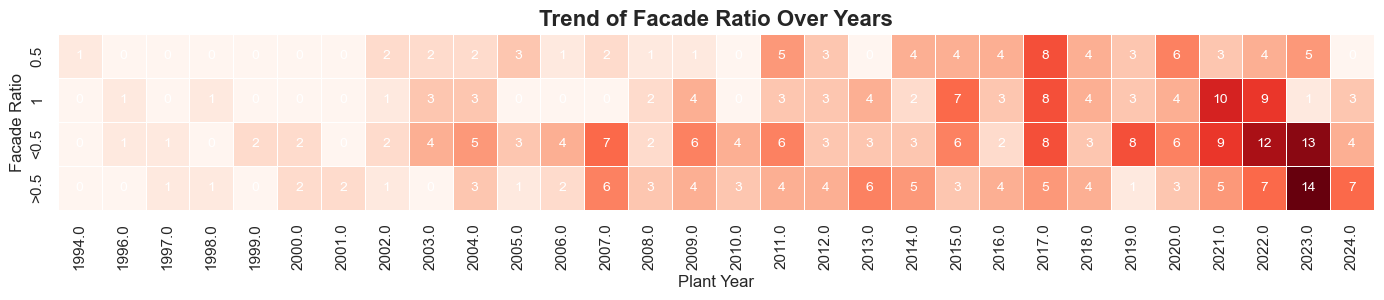

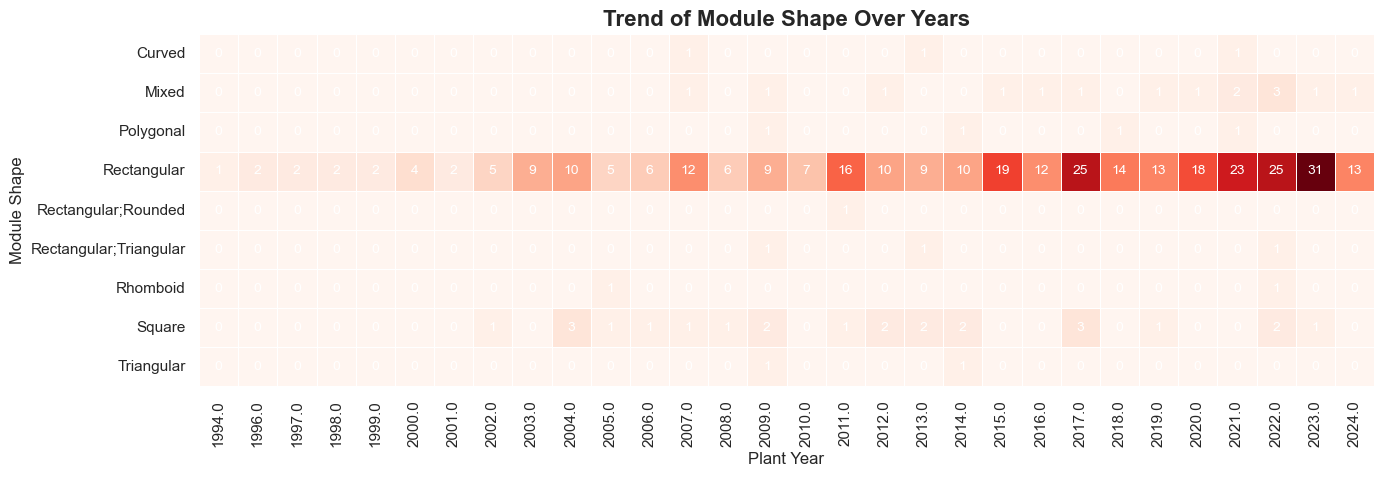

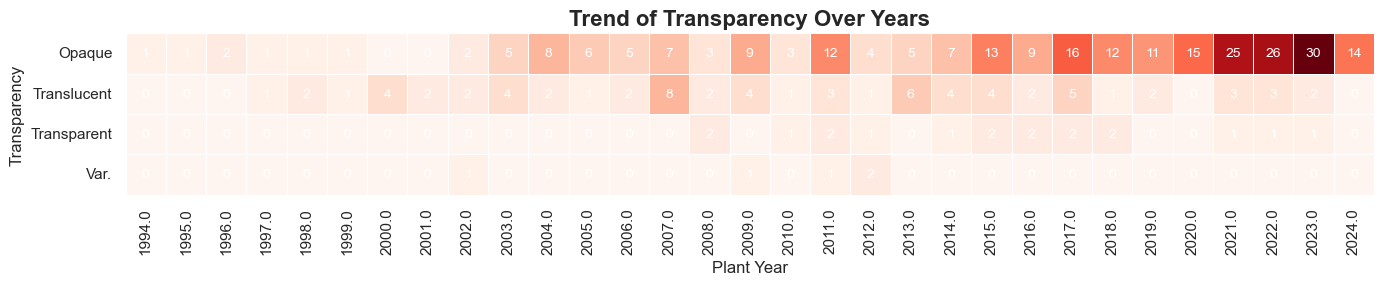

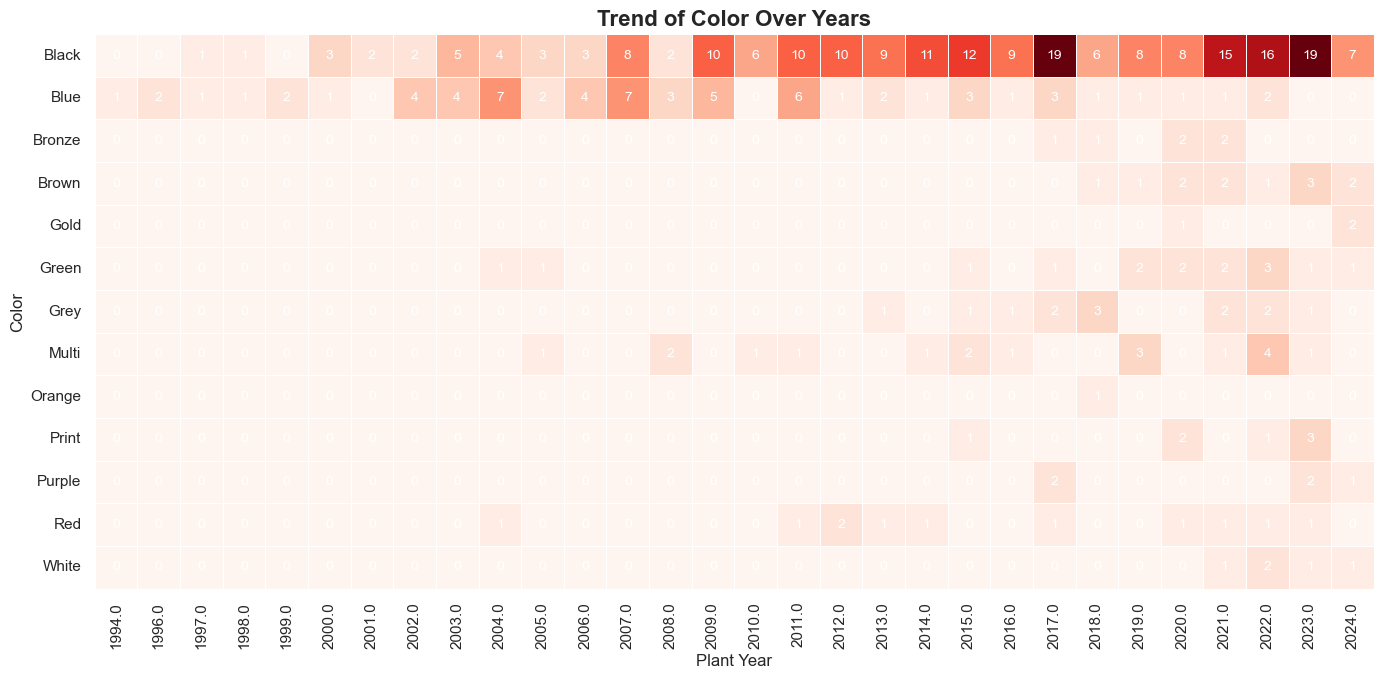

In [7]:
# ---------------------------------------------------
# 5. Trend Heatmaps per Year for Categorical Features
# ---------------------------------------------------

# Features to analyze across years
trend_features = ['facade_composition_2', 'concept', 'texture', 'cell_visibility', 
                  'module_size', 'facade_ratio', 'module_shape', 'transparency', 'color']

# Setup output directory for saving (optional)
import os
output_dir = "trend_outputs"
os.makedirs(output_dir, exist_ok=True)

# Set seaborn style for all plots
sns.set_theme(style="white")

for feature in trend_features:
    # Group and count occurrences per year
    category_counts = df.groupby(['plant_year', feature]).size().unstack(fill_value=0)
    
    # Plot heatmap with annotations
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        category_counts.T,  # Transpose for better orientation
        square=True,
        linewidths=0.5,
        cmap="Reds",
        cbar=False,  # <--- REMOVE color bar
        annot=True,  # <--- ADD numbers inside squares
        fmt='d',  # <--- Integer format
        annot_kws={"size": 10, "color": "white", "va": "center"}
    )
    plt.title(f"Trend of {feature.replace('_', ' ').title()} Over Years", fontsize=16, fontweight='bold')
    plt.xlabel("Plant Year", fontsize=12)
    plt.ylabel(feature.replace('_', ' ').title(), fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Save the plot
    #plot_filename = os.path.join(output_dir, f"{feature}_trend_heatmap_labeled.png")
    #plt.savefig(plot_filename, dpi=300)
    #print(f"Heatmap saved as {plot_filename}")

    # Optionally, save counts table as CSV (Figures in the paper are post processed in Excel)
    #csv_filename = os.path.join(output_dir, f"{feature}_trend_data.csv")
    #category_counts.T.to_csv(csv_filename)
    #print(f"Trend data saved as {csv_filename}")
    
    plt.show()
